In [46]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [47]:
homeless = pd.read_csv('homeless_correlation.csv')

In [48]:
homeless.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 25 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   homeless_rate                                         276 non-null    float64
 1   Income_deprivation_score_2019                         276 non-null    float64
 2   GDP                                                   276 non-null    float64
 3   earnings                                              276 non-null    float64
 4   house_price                                           276 non-null    float64
 5   white                                                 276 non-null    float64
 6   Black / African / Caribbean / Black British: African  276 non-null    float64
 7   Asian/Asian_Britian                                   276 non-null    float64
 8   Mixed / Multiple ethnic groups                        276 no

In [49]:
homeless.head()

,homeless_rate,Income_deprivation_score_2019,GDP,earnings,house_price,white,Black / African / Caribbean / Black British: African,Asian/Asian_Britian,Mixed / Multiple ethnic groups,Full-time\n work,...,Not working due to long-term illness / disability,Retired,16-17,18-24,25-34,35-44,45-54,55-64,65-74,75+
0,2.1655,0.1080,2.1789,2.7200,3.1700,0.9200,0.0300,0.0000,0.0100,0.1600,...,0.2800,0.0100,0.0000,0.2200,0.2800,0.2700,0.1200,0.0900,0.0100,0.0100
1,3.0816,0.1090,2.4865,2.8300,1.7000,0.9600,0.0200,0.0100,0.0100,0.0900,...,0.2300,0.0200,0.0000,0.2500,0.3300,0.2000,0.1300,0.0700,0.0100,0.0100
2,3.5873,0.1040,1.8389,2.5200,2.8200,0.9500,0.0100,0.0100,0.0100,0.1100,...,0.2700,0.0300,0.0000,0.2300,0.2900,0.2100,0.1700,0.0700,0.0300,0.0100
3,2.7116,0.1520,2.5506,2.7400,1.4300,0.9200,0.0100,0.0100,0.0000,0.1300,...,0.0900,0.0200,0.0000,0.2900,0.3000,0.2100,0.1200,0.0500,0.0200,0.0000
4,4.2895,0.1100,2.8532,2.8800,2.8000,0.8700,0.0400,0.0100,0.0200,0.1100,...,0.1100,0.0200,0.0100,0.2700,0.3400,0.1900,0.1200,0.0400,0.0200,0.0100


Text(0.5, 1.0, 'Correlation Matrix')

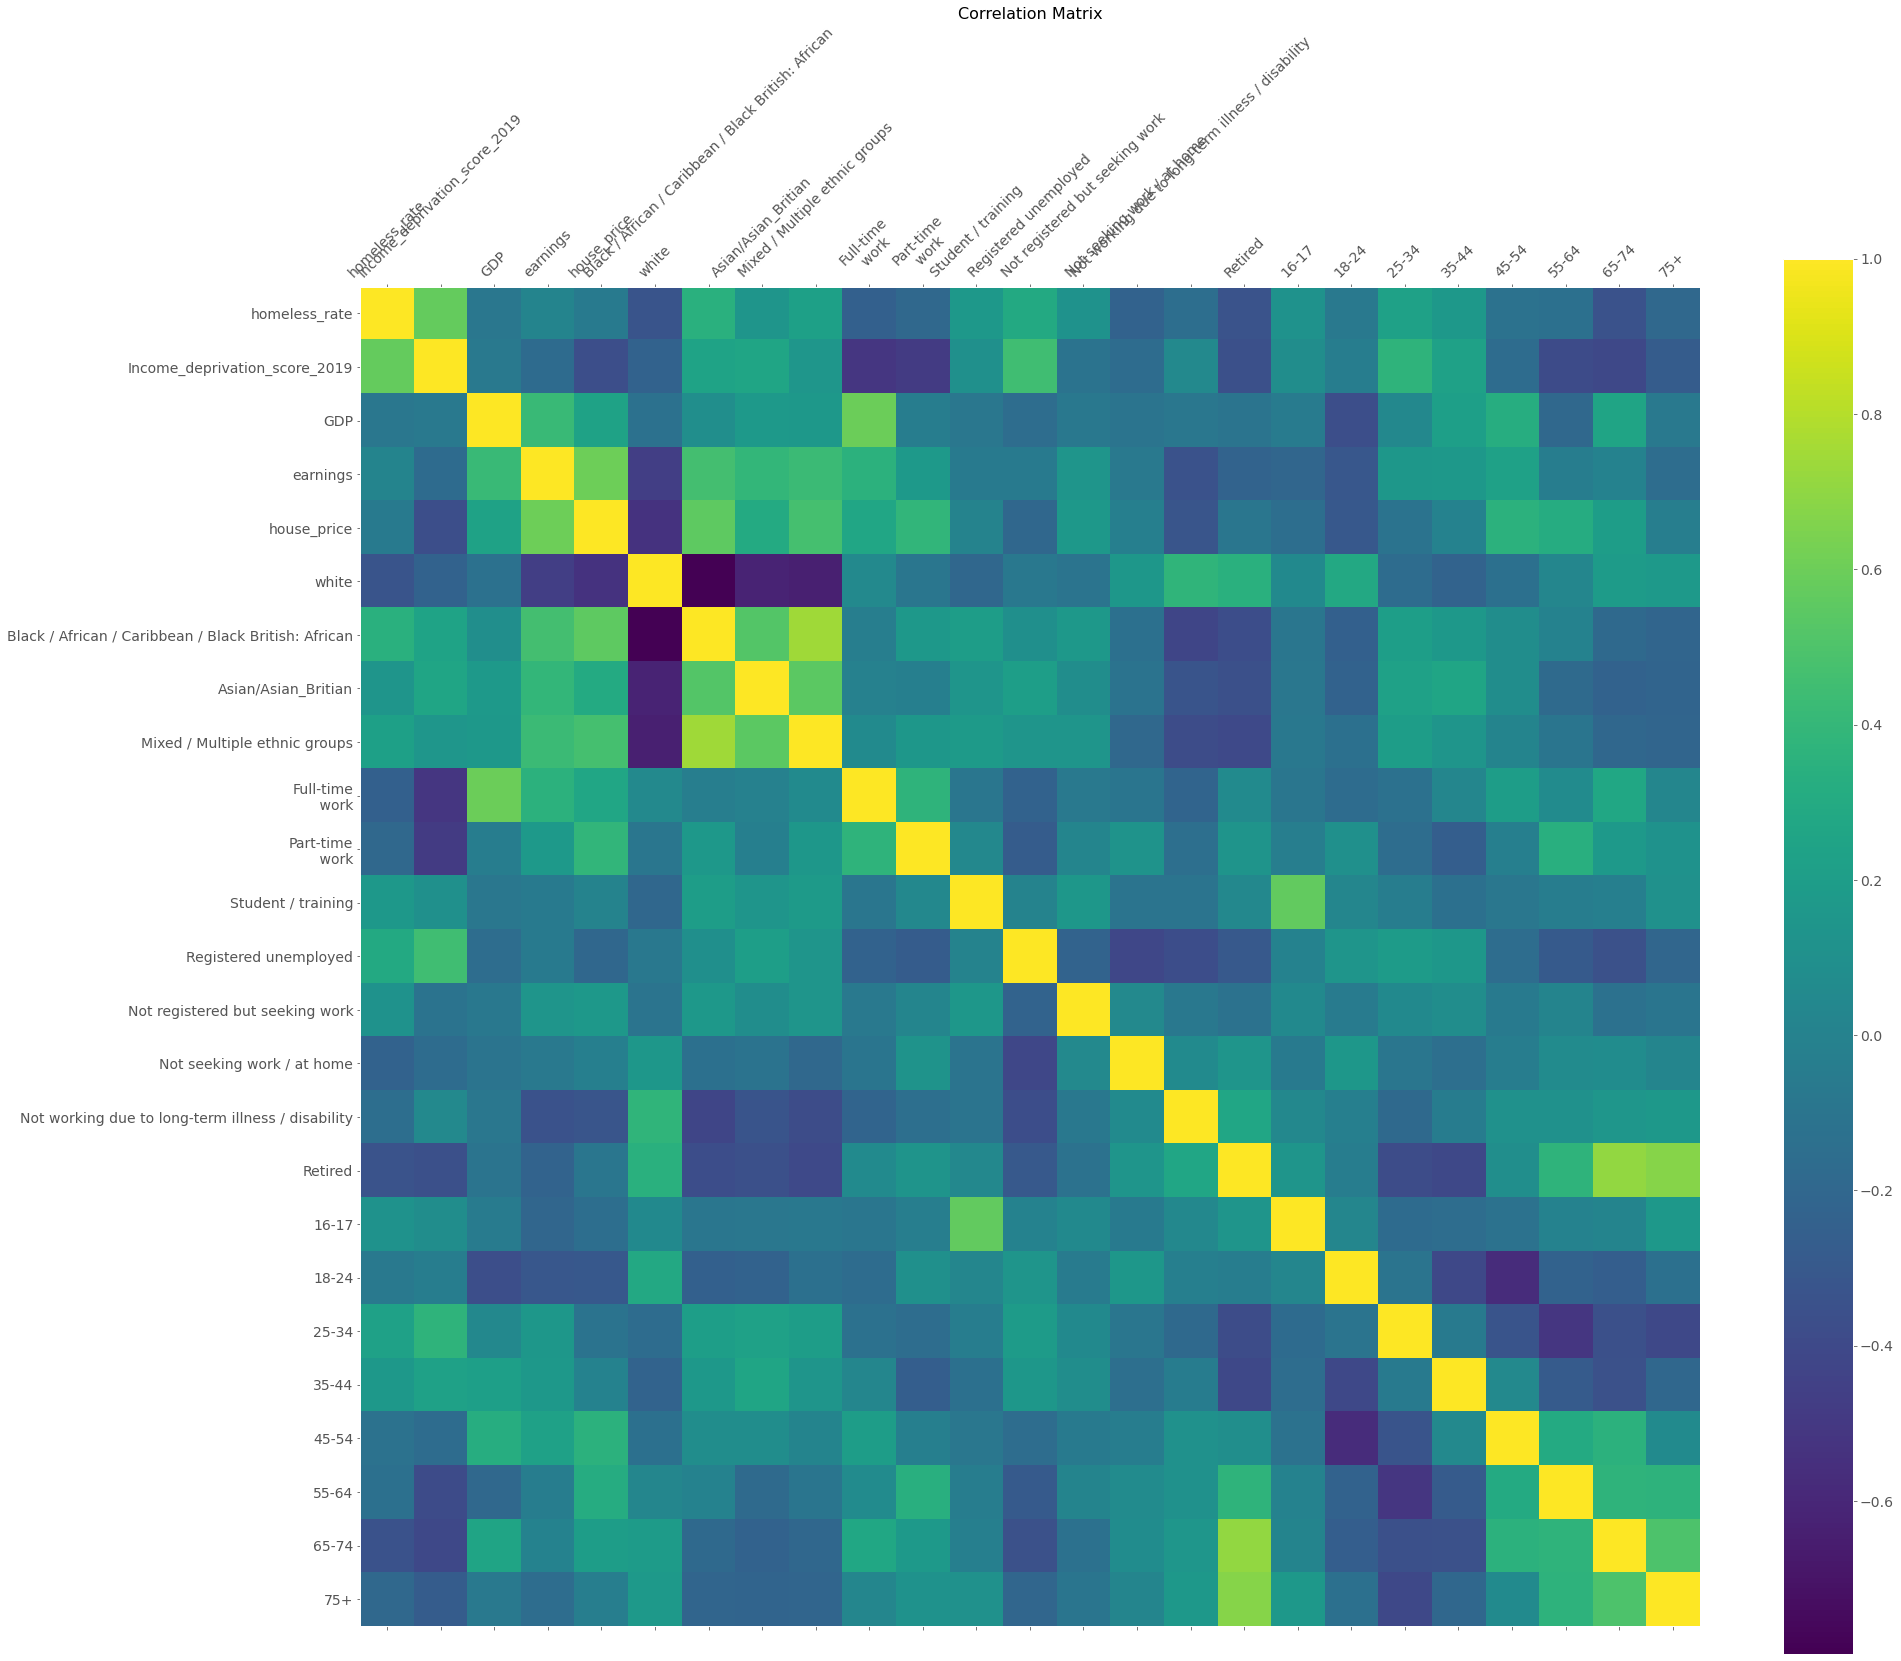

In [63]:
df = homeless
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(30, 25))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

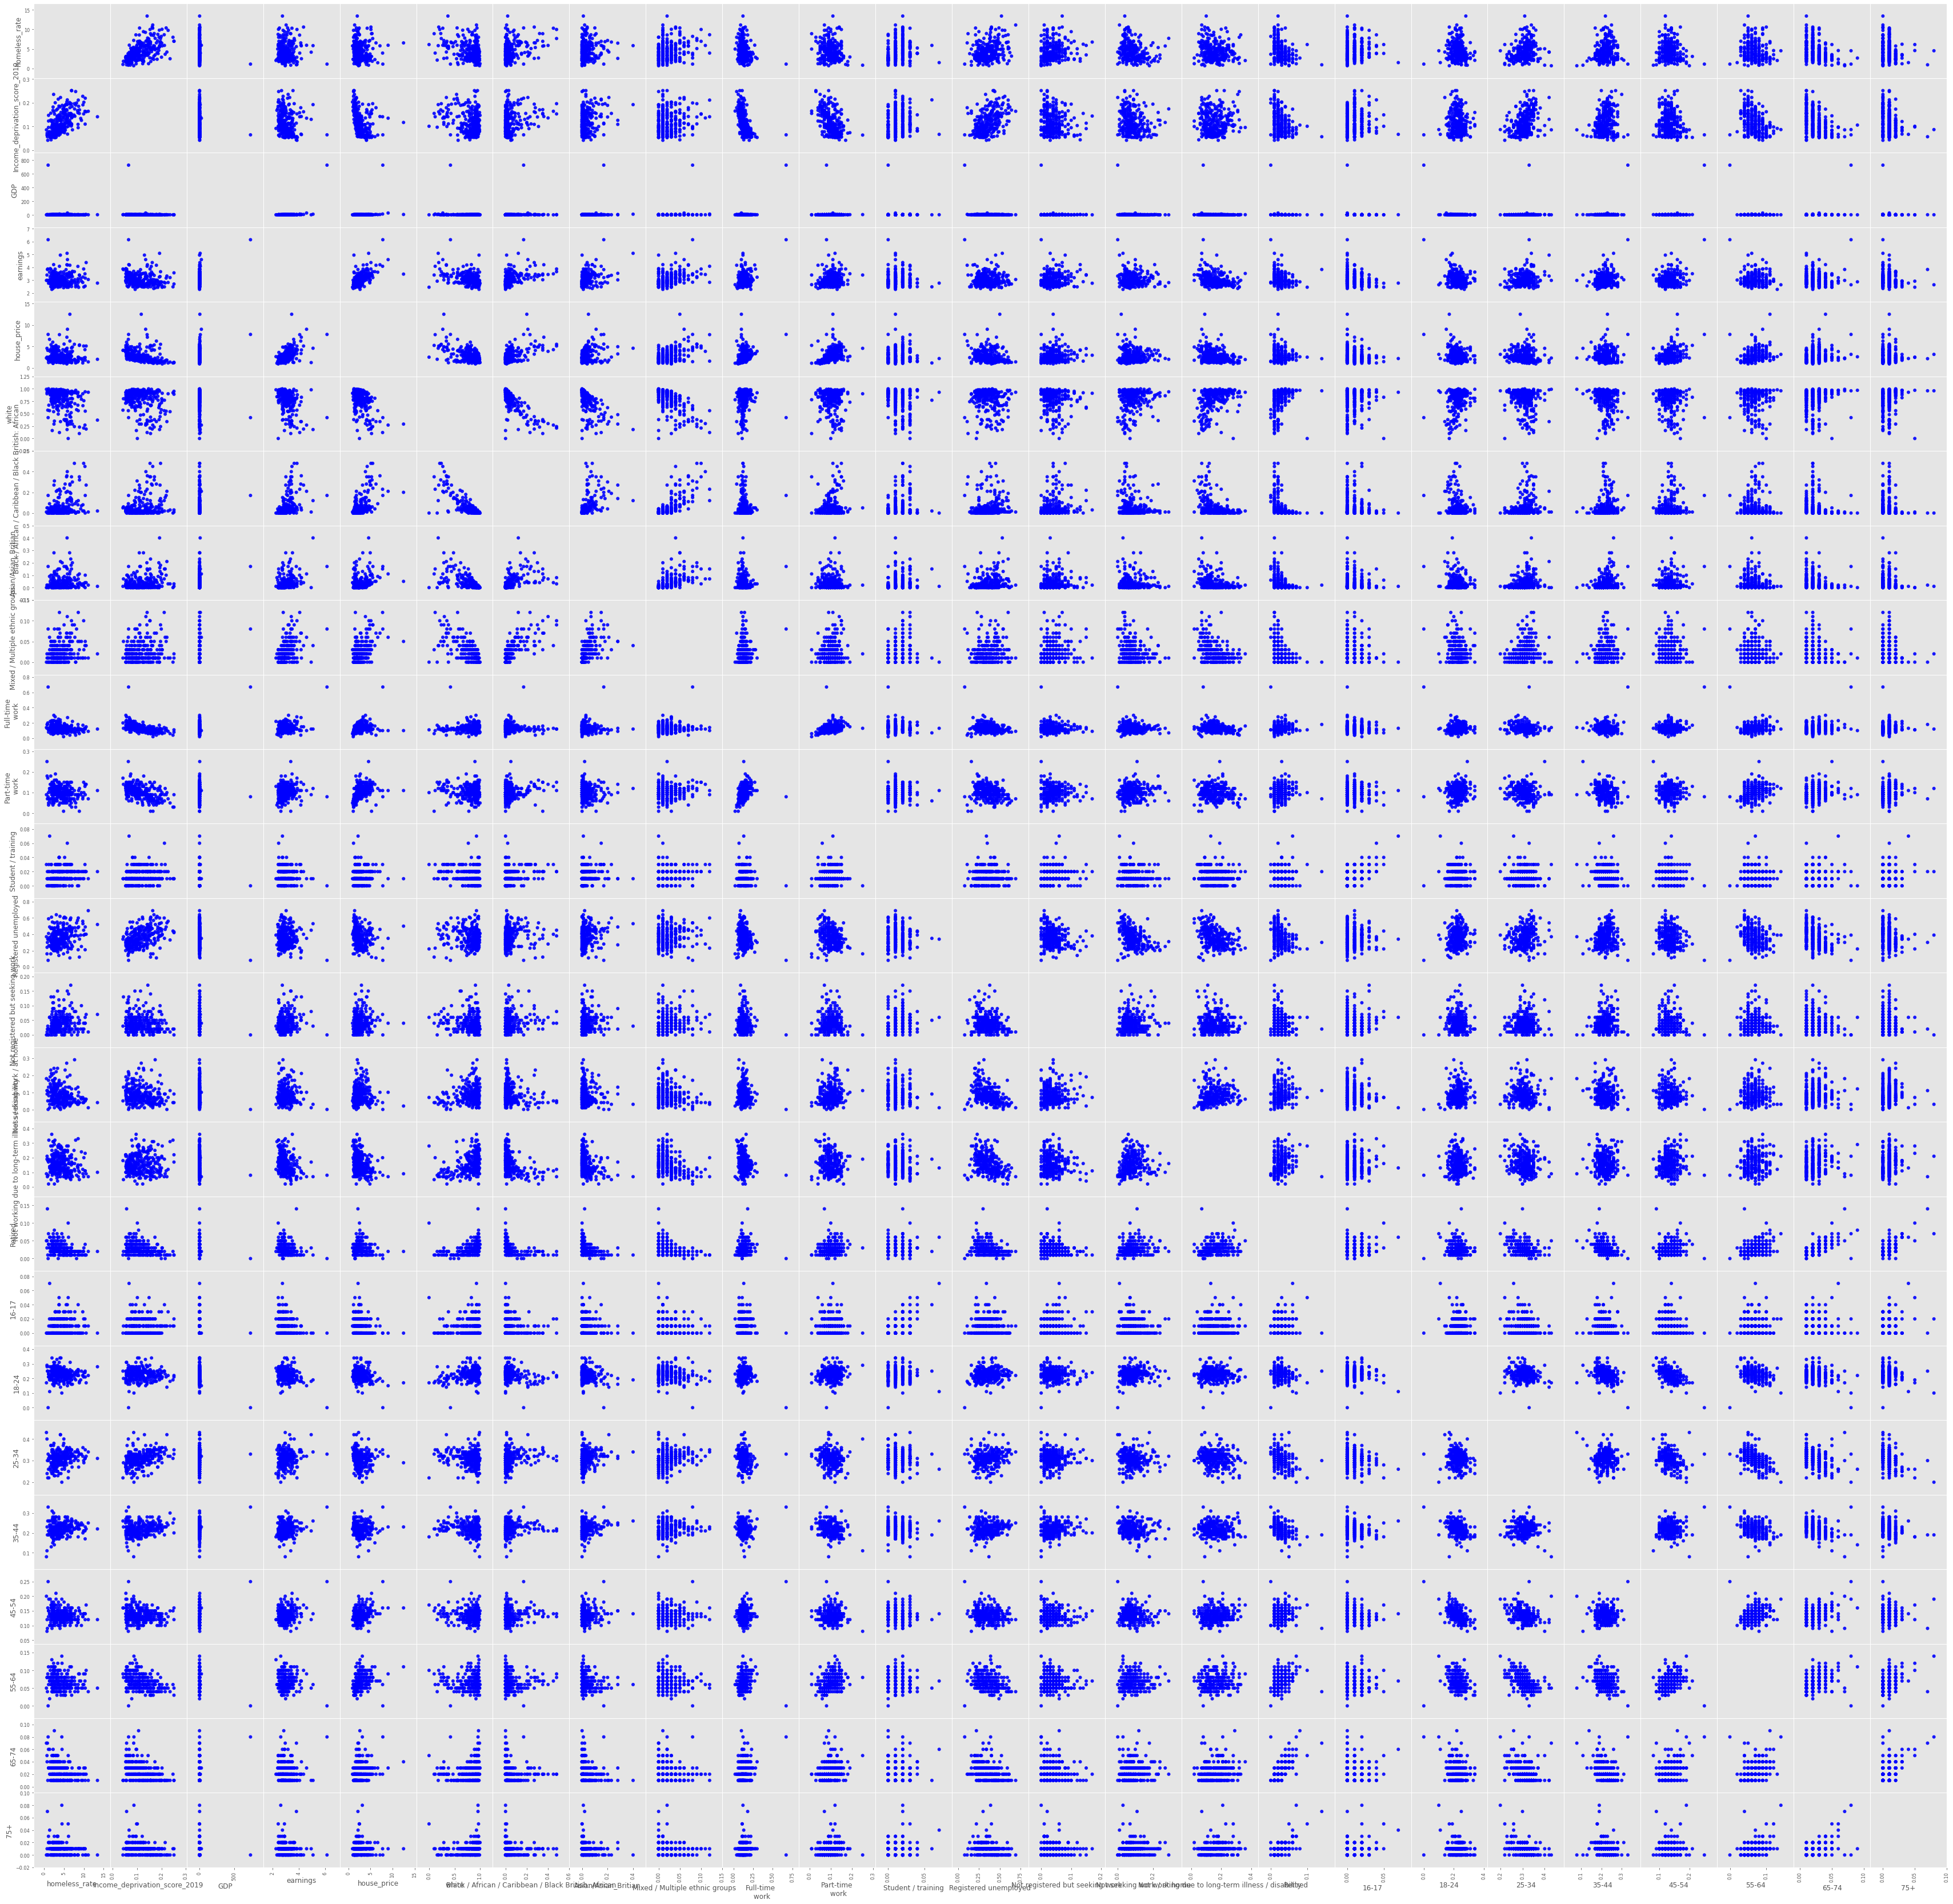

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


fig = pd.plotting.scatter_matrix(homeless,figsize=(60,60),c ='blue',marker = 'o',diagonal='',alpha =0.9,range_padding=0.5)  # diagonal只能为'hist'/'kde'
plt.show()

In [56]:
homeless.corr()

,homeless_rate,Income_deprivation_score_2019,GDP,earnings,house_price,white,Black / African / Caribbean / Black British: African,Asian/Asian_Britian,Mixed / Multiple ethnic groups,Full-time\n work,...,Not working due to long-term illness / disability,Retired,16-17,18-24,25-34,35-44,45-54,55-64,65-74,75+
homeless_rate,1.0000,0.5788,-0.0861,0.0127,-0.0614,-0.3318,0.3466,0.1426,0.2237,-0.2460,...,-0.1441,-0.3340,0.1211,-0.0669,0.2304,0.1626,-0.1170,-0.1357,-0.3462,-0.1880
Income_deprivation_score_2019,0.5788,1.0000,-0.0734,-0.1707,-0.3620,-0.2352,0.2444,0.2572,0.1440,-0.5156,...,0.0474,-0.3578,0.0870,-0.0326,0.3738,0.2292,-0.1641,-0.3837,-0.4095,-0.2721
GDP,-0.0861,-0.0734,1.0000,0.4194,0.2386,-0.1260,0.0906,0.1651,0.1612,0.5987,...,-0.0837,-0.1068,-0.0522,-0.3622,0.0423,0.2162,0.3236,-0.1914,0.2491,-0.0675
earnings,0.0127,-0.1707,0.4194,1.0000,0.6052,-0.4648,0.4628,0.3913,0.4263,0.3597,...,-0.3408,-0.2263,-0.2053,-0.3118,0.1569,0.1614,0.2337,-0.0386,0.0018,-0.1523
house_price,-0.0614,-0.3620,0.2386,0.6052,1.0000,-0.5303,0.5533,0.3030,0.4695,0.2648,...,-0.3228,-0.0918,-0.1457,-0.3020,-0.1112,-0.0032,0.3573,0.3189,0.2036,-0.0260
white,-0.3318,-0.2352,-0.1260,-0.4648,-0.5303,1.0000,-0.7967,-0.6202,-0.6415,0.0469,...,0.3819,0.3458,0.0536,0.2870,-0.1591,-0.2243,-0.1355,0.0247,0.1897,0.1767
Black / African / Caribbean / Black British: African,0.3466,0.2444,0.0906,0.4628,0.5533,-0.7967,1.0000,0.5226,0.7415,-0.0305,...,-0.4181,-0.3710,-0.0903,-0.2455,0.2109,0.1612,0.0838,0.0030,-0.1842,-0.2081
Asian/Asian_Britian,0.1426,0.2572,0.1651,0.3913,0.3030,-0.6202,0.5226,1.0000,0.5507,-0.0086,...,-0.3267,-0.3558,-0.0873,-0.2341,0.2314,0.2591,0.0874,-0.1754,-0.2336,-0.2175
Mixed / Multiple ethnic groups,0.2237,0.1440,0.1612,0.4263,0.4695,-0.6415,0.7415,0.5507,1.0000,0.0637,...,-0.3775,-0.4028,-0.0752,-0.1348,0.2042,0.1432,0.0136,-0.0976,-0.1984,-0.2101
Full-time\n work,-0.2460,-0.5156,0.5987,0.3597,0.2648,0.0469,-0.0305,-0.0086,0.0637,1.0000,...,-0.2210,0.0650,-0.0907,-0.1591,-0.1235,0.0271,0.2002,0.0725,0.2770,0.0297
